<div align="center">
<a href="https://vbti.nl"><img src="https://docs.google.com/uc?export=download&id=1DdCGllL51O5wBuiI0rwygofKx3YIDPHX" width="400"></a>
</div>

# Welcome to the DRL masterclass!

On 16 and 17 of February we are going to dive into topics of Reinforcement and Deep Reinforcement Learning! During these two days we are going to review a lot of concepts. Since we won't have time to explain everything in detail, we have prepared this notebook to give you a headstart. Please, run this notebook ("Cell" -> "Run All") and make sure there are no dependencies errors.

Since the topic of Deep Learning deserves a separate Masterclass (or two), we are not going to dive into the details of training Deep Learning models. Do not worry, we will try to focus primarily on the Reinforcement Learning part of the Deep Reinforcement Learning and will treat Artificial Neural Networks as tools to approximate functions.

In this notebook, we have included an explanation of the main interface and the functionality of  <a href="https://gym.openai.com/">[Open AI Gym]</a>, [Keras](https://keras.io/) and [Tensorflow](https://www.tensorflow.org/). 

If you are familiar with **OpenAI Gym Interface**, **Gym Wrappers and Monitors**, **Keras Sequential API**, **Gradient Tapes** and **Tensorflow Datasets** you can freely skip this notebook (run it only for the dependencies check). 

# Importing Libraries

In [1]:
import gym
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import yaml
import pygame
import seaborn as sns

pygame 2.0.0 (SDL 2.0.12, python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


# OpenAI Gym
### Environment Class
The main OpenAI Gym class. It encapsulates an environment with arbitrary behind-the-scenes dynamics. You can manually create an Atari environment using this class.

You can manualy create an Atari environment like this:
```python
from gym.envs.atari import AtariEnv
env = AtariEnv(game='pong', obs_type='image')
```
However, there are a lot of premade environments that are stored in a registry. This is convenient because you need to know only the *id* of the environment to create it.

```python
import gym
env = gym.make(id='PongDeterministic-v4')
```

We can check the list of all available environments with the following command:

In [2]:
from gym import envs
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs]
print(env_ids)

['Copy-v0', 'RepeatCopy-v0', 'ReversedAddition-v0', 'ReversedAddition3-v0', 'DuplicatedInput-v0', 'Reverse-v0', 'CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v0', 'Acrobot-v1', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v0', 'Blackjack-v0', 'KellyCoinflip-v0', 'KellyCoinflipGeneralized-v0', 'FrozenLake-v0', 'FrozenLake8x8-v0', 'CliffWalking-v0', 'NChain-v0', 'Roulette-v0', 'Taxi-v3', 'GuessingGame-v0', 'HotterColder-v0', 'Reacher-v2', 'Pusher-v2', 'Thrower-v2', 'Striker-v2', 'InvertedPendulum-v2', 'InvertedDoublePendulum-v2', 'HalfCheetah-v2', 'HalfCheetah-v3', 'Hopper-v2', 'Hopper-v3', 'Swimmer-v2', 'Swimmer-v3', 'Walker2d-v2', 'Walker2d-v3', 'Ant-v2', 'Ant-v3', 'Humanoid-v2', 'Humanoid-v3', 'HumanoidStandup-v2', 'FetchSlide-v1', 'FetchPickAndPlace-v1', 'FetchReach-v1', 'FetchPush-v1', 'HandReach-v0', 'HandManipulateBlockRotateZ-v0', 'HandManipulateBlockRotateZTouchSensors-v0', 'HandM

## Interface
This class implements three usefull methods:
- ```env.reset()``` - resets the state of the environment and returns an initial observation.
- ```env.step(action)``` - run one timestep of the environment's dynamics. When end of episode is reached, you are responsible for calling ```reset()``` to reset this environment's state.
- ```env.render()``` - renders the environment. Usefull if we would like to observe the agent playing.
- ```env.observation_space``` - observation space of the environment
- ```env.action_space``` - action space of the environment

In [4]:
import gym

env = gym.make('CartPole-v1')
print('Observation space type:', type(env.observation_space))
print('Action space type:', type(env.action_space))

Observation space type: <class 'gym.spaces.box.Box'>
Action space type: <class 'gym.spaces.discrete.Discrete'>


There are two major types of observation and action spaces: **Box** and **Discrete**. You can find these objects under ```gym.spaces.box.Box``` and ```gym.spaces.discrete.Discrete```.

CartPole observation and action definition, defined [here](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py#L26):
```
    Observation:
        Type: Box(4)
        Num     Observation               Min                     Max
        0       Cart Position             -4.8                    4.8
        1       Cart Velocity             -Inf                    Inf
        2       Pole Angle                -0.418 rad (-24 deg)    0.418 rad (24 deg)
        3       Pole Angular Velocity     -Inf                    Inf
    Actions:
        Type: Discrete(2)
        Num   Action
        0     Push cart to the left
        1     Push cart to the right
```

### Box Space
**Box** space is continuous space. You can better think about it as a numpy array. It has a shape and for each element the lowest and highest possible value is defined.

In [4]:
print('Box space:', env.observation_space)
print('Observation shape:', env.observation_space.shape)
print('Low:', env.observation_space.low)
print('High:', env.observation_space.high)

Box space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
Observation shape: (4,)
Low: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
High: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


### Discrete Space
**Discrete** space is ... discrete. It is fully defined by the **number of actions**.

In [5]:
print('Discrete space:', env.action_space)
print('Number of actions:', env.action_space.n)

Discrete space: Discrete(2)
Number of actions: 2


These spaces are suitable for both **observation** and **action** spaces. There are more spaces under ```gym.spaces```, but we will not need them in this Masterclass.

### ```env.reset()```
This method should be called **before every episode**. It will return an initial observation.

In [6]:
obs = env.reset()
print(obs)

[ 0.01438535  0.03736129 -0.02220345 -0.04536134]


### ```env.step(action)```
This method is responsible for controlling the environment. ```action``` parameter should comply with the action space of the environment. When correct action is passed it will return a ```tuple``` with 4 elements: ```next_obs, reward, done, info```.

- ```next_obs``` - next observation for our agent. Unless state otherwise it has type ```np.float64```.
- ```reward``` - scalar reward
- ```done``` - boolean value whether the episode is finished or not. After we receive ```done==True``` we need to call ```env.reset()```. Otherwise, the behaviour of the environment will be *undefined*
- ```info``` - dictionary with extra values returned by an environment

In [7]:
action = np.random.randint(env.action_space.n)
next_obs, reward, done, info = env.step(action)
print('Next obs:', next_obs)
print('Reward:', reward)
print('Done:', done)
print('Info:', info)

Next obs: [ 0.01513258  0.23279447 -0.02311067 -0.34496614]
Reward: 1.0
Done: False
Info: {}


The minimal code for a loop that plays one episode should look something like this:

In [8]:
done = False
steps = 0
env.reset()
while not done:
    action = env.action_space.sample()                  
    observation, reward, done, info = env.step(action)  
    steps += 1 

print('Steps:', steps)

Steps: 20


## Atari Environments
In the previous examples, the environments' input state was a low dimensional vector. What if we don't have the access to the internal information and can only observe the game screen? Arcade Learning Environment is the library that implements many games from the Atari 2060 and allows us to control them through a convenient Gym interface.

Arcade Learning Environment ALE <a href="https://arxiv.org/pdf/1207.4708.pdf"> [paper]</a> was developed in 2013 as an evaluation benchmark for general learning algorithms. Open AI gym <a href="https://arxiv.org/abs/1606.01540">[paper]</a>

For the Atari games the environments *ids* are following following naming convention:
<img src="https://i.ibb.co/K9RLckY/env-ids.png" width=700>
<center>Explanation of the naming convention. <a href="https://www.endtoend.ai/envs/gym/atari/">[source]</a><center>

    
The Atari emulator generates frames at 60Hz. It would be 'unfair' if an algorithm could update its actions every frame, as a human cannot control a joystick at 60Hz. Therefore, some environments apply the same action to multiple frames. This can be a fixed number of frames or a random number of frames. The figure above explains in detail the naming convention.
    
Since all Atari games are inherently deterministic the brute search is a viable option for solving these games. Repeat action probability *p* is responsible for injecting stochasticity into the environment by holding the action constant for the next frame. This mechanic was proposed in Revisiting the Arcade Learning Environment <a href="https://arxiv.org/abs/1709.06009">[paper]</a>. By making the environment stochastic we make sure that the agent does not rely on memorization when playing the game.
    

## Gym Wrappers and Monitors


### Wrappers

Environment wrapper is a very important tool that allows to extend the functionality of an environment in various ways. It can be used to preprocess observations, modify actions or rewards. Wrappers allows to make all of those changes in a very clean way without altering the functionality of an agent.

```python
class BasicWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.env = env
        
    def step(self, action):
        next_state, reward, done, info = self.env.step(action)
        # modify ...
        return next_state, reward, done, info
```
<img src="https://i.ibb.co/ZLfyqxt/env-wrapper.png">

## Monitors
Monitors is a convenient way of keeping track of what the environment is doing. The most common use of the Monitor is to record a video of an agent playing. This can be done with a simple:

```python
import gym
from gym import wrappers

env = gym.wrappers.Monitor(env, directory='recording')
```

# Example: Random Agent
Lets implement a random agent class that have only one ```compute_action()``` method.

In [9]:
import random
class RandomAgent:

    def __init__(self, n_actions):
        self.n_actions = n_actions

    def compute_action(self, state):
        return np.random.randint(self.n_actions)

You do not need much code to run an episode, but it would be nice to keep track the performance of the agent. Since the reward at every time step is the difference between the scores, summing up all of the rewards would give us the final score of the game.

In [10]:
import time
import matplotlib.pyplot as plt
from IPython.core import display

# Define loop for one episode
def run_episode(env, agent, max_steps=100_000, render=False, sleep=0.):
    is_terminal = False
    score = 0
    steps = 0
    start_timer = time.time()

    current_state = env.reset()

    if render:
        img = plt.imshow(env.render(mode='rgb_array'))  # only call this once

    while (not is_terminal) and (steps < max_steps):
        # get action from the agent

        action = agent.compute_action(current_state)

        # advance one step in the environment
        next_state, reward, is_terminal, info = env.step(action)

        # update score
        score += reward

        # update current state
        current_state = next_state

        if render:
            # render the frame and pause
            img.set_data(env.render(mode='rgb_array'))  # just update the data
            display.display(plt.gcf())
            display.clear_output(wait=True)
            time.sleep(sleep)

        steps += 1

    total_time = time.time() - start_timer
    return {'score': score,
            'steps_per_game': steps,
            'framerate': steps / (total_time + 1e-6)}

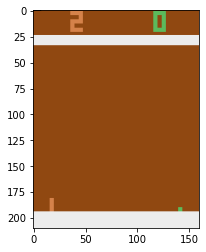

In [11]:
import gym
env = gym.make('PongDeterministic-v4')
agent = RandomAgent(env.action_space.n)
run_episode(env, agent, render=True, max_steps=100)
env.close()

As you might notice this takes a long time to render an environment in this way. That is why we have limited the number of steps to 100. Now we are going to use a ```Monitor```.

In [12]:
from os.path import join
video_folder = join('Experiments', 'random_pong')
env = gym.make('PongDeterministic-v4')
env = gym.wrappers.Monitor(env, video_folder, force=True, video_callable=lambda eps_id: True)

agent = RandomAgent(env.action_space.n)

stats = run_episode(env, agent, render=False)

# You need to call this method for the video to be saved
env.close()

print(stats)

{'score': -19.0, 'steps_per_game': 1025, 'framerate': 418.6335588219715}


We have successfully recorded the gameplay of our RandomAgent. We can load the *last* recoded video with the following code.

In [13]:
from IPython.display import Video
import os

# take the last element in the folder with .mp4 extension
video_name = [x for x in os.listdir(video_folder) if '.mp4' in x][-1]
Video(os.path.join(video_folder, video_name))

You can also just navigate to the folder and open it with your regular video player.

The same piece of code works for the Cartpole or any other environment.

In [14]:
from os.path import join
video_folder = join('Experiments', 'random_cartpole')
env = gym.make('CartPole-v1')
env = gym.wrappers.Monitor(env, video_folder, force=True, video_callable=lambda eps_id: True)

agent = RandomAgent(env.action_space.n)

stats = run_episode(env, agent, render=False)
env.close()

print(stats)

C:\Users\ikayn\anaconda3\envs\rl_env\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


{'score': 13.0, 'steps_per_game': 13, 'framerate': 22.114659098683923}


In [15]:
from IPython.display import Video
import os

# take the last element in the folder with .mp4 extension
video_name = [x for x in os.listdir(video_folder) if '.mp4' in x][-1]
Video(os.path.join(video_folder, video_name))

# Training a Neural Network
Since a big part of training Deep Reinforcement Learning agents concerns training neural networks, we include a small example. In this section we are going to show you how to build and train a simple neural network using keras. We are going to use a "Hello World" MNIST dataset.

## Data

In [6]:
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_val, y_val) = mnist.load_data()

# scale data
x_train, x_val = x_train / 255.0, x_val / 255.0

# inspect shape and type
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_val.dtype, y_train.dtype

((60000, 28, 28),
 (60000,),
 (10000, 28, 28),
 (10000,),
 dtype('float64'),
 dtype('uint8'))

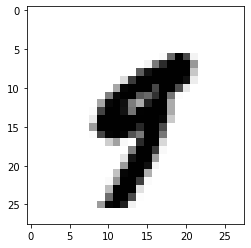

In [7]:
# plot a sample point
plt.imshow(x_train[36000], cmap='binary')

In [8]:
# reformat data in the form (batch_size, input_vector_size)
print("Change X array from shape {} ... ".format(x_train.shape))
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1]*x_val.shape[2])
print("to shape {}".format(x_train.shape))

# reformat target vector from categorical label to one-hot-encoding
from tensorflow.keras import utils

# reformat labels to one-hot-encoded labels
print('Before y_train[0] = {}'.format(y_train[0]))
y_train = utils.to_categorical(y_train, 10)
y_val = utils.to_categorical(y_val, 10)
print('After y_train[0] = {}'.format(y_train[0]))

Change X array from shape (60000, 28, 28) ... 
to shape (60000, 784)
Before y_train[0] = 5
After y_train[0] = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Model
### Sequential API [[Guide]](https://keras.io/guides/sequential_model/)

Keras allows you to specify a neural network as a collection of layers. With Sequential API you can stack layers on top of each other. 

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# define model topology
model = models.Sequential()
model.add(layers.Dense(40, activation='relu', input_shape=(784,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# define model optimization method
model.compile(optimizer=optimizers.Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['categorical_accuracy'])

### Training a model
#### ```model.fit()```
We can train a model by calling ```model.fit()```. This is the easiest way of training a model.

In [20]:
history = model.fit(x_train, y_train, epochs=20, batch_size=60, validation_data=(x_val, y_val))

Epoch 1/20
1000/1000 [==============================] - 1s 823us/step - loss: 0.0646 - categorical_accuracy: 0.8883 - val_loss: 0.0373 - val_categorical_accuracy: 0.9372
Epoch 2/20
1000/1000 [==============================] - 1s 775us/step - loss: 0.0333 - categorical_accuracy: 0.9452 - val_loss: 0.0322 - val_categorical_accuracy: 0.9426
Epoch 3/20
1000/1000 [==============================] - 1s 735us/step - loss: 0.0268 - categorical_accuracy: 0.9554 - val_loss: 0.0262 - val_categorical_accuracy: 0.9553
Epoch 4/20
1000/1000 [==============================] - 1s 803us/step - loss: 0.0224 - categorical_accuracy: 0.9622 - val_loss: 0.0209 - val_categorical_accuracy: 0.9637
Epoch 5/20
1000/1000 [==============================] - 1s 880us/step - loss: 0.0197 - categorical_accuracy: 0.9677 - val_loss: 0.0213 - val_categorical_accuracy: 0.9638
Epoch 6/20
1000/1000 [==============================] - 1s 745us/step - loss: 0.0174 - categorical_accuracy: 0.9712 - val_loss: 0.0207 - val_categoric

## Functional API [[Guide]](https://keras.io/guides/functional_api/)
In case your model needs to have multiple inputs/outputs or the flow of the data is not sequential, we can use ```Functional``` API for this. It allows building more complex models by providing tools for building computational graphs manually. Starting with the input layer ```input_layer = Input()``` which is our input Tensor, we can apply a layer on it and receive the output tensor. 

```python
input_tensor = Input()
layer = Dense(4)
output_tensor_hidden_1 = layer(input_tensor) 
```

Repeat these operations with other layers to connect all model components. We can also combine outputs and freely reuse the layers if necessary.

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape=(x_train.shape[-1], ))
output_hidden_1 = Dense(40, name='hidden_1', activation='tanh')(input_layer)
output_hidden_1 = Dense(20, name='hidden_2', activation='tanh')(input_layer)
output_hidden_2 = Dense(10, name='hidden_3', activation='tanh')(output_hidden_1)
output = Dense(10, name='output', activation='softmax')(output_hidden_2)
model = Model(inputs=[input_layer], outputs=[output])

# The rest of the configuration is the same
optimizer = tf.keras.optimizers.SGD(
                learning_rate=0.01,
                momentum=0.9,
                nesterov=False,
                name='SGD',)

# Specify the training configuration (optimizer, loss, metrics)
model.compile(optimizer=optimizer, loss='mse', metrics=['acc'])

history = model.fit(
                x=x_train,
                y=y_train,
                batch_size=64,
                epochs=20,
                verbose=1, # 0 = silent, 1 = progress bar, 2 = one line per epoch.
                validation_split=0.2, #Float between 0 and 1. Fraction of the training data to be used as validation data.
)

Epoch 1/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0767 - acc: 0.4334 - val_loss: 0.0637 - val_acc: 0.6167
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0565 - acc: 0.6644 - val_loss: 0.0495 - val_acc: 0.7147
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0457 - acc: 0.7282 - val_loss: 0.0408 - val_acc: 0.7672
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0383 - acc: 0.7728 - val_loss: 0.0341 - val_acc: 0.7997
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0327 - acc: 0.8026 - val_loss: 0.0292 - val_acc: 0.8334
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0284 - acc: 0.8392 - val_loss: 0.0253 - val_acc: 0.8642
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0249 - acc: 0.8620 - val_loss: 0.0222 - val_acc: 0.8786
Epoch 8/20
750/750 [==============================] - 1s 1ms/step - loss: 0.

## Custom training loop
For Reinforcement Learning applications it is important to know how to train a model with a custom training loop. It gives you more freedom in defining the computational flow. Make sure that you understand how all of these elements work, since we are going to use them for training our DRL agents.

### ```Dataset```
Important part of the custom training loop is the ```Dataset``` object. It allows to create, shuffle, batch and then iterate through the data in a very straightforward manner: using Python loop syntax `for inputs, targets in dataset:`.

In [30]:
# Create a dataset instance, shuffle it and set the batch size
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(1).batch(60)

# The same goes for the testing dataset
test_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(60)

### ```Losses``` and ```Metrics```

In [31]:
# define the loss object. It can be any function that accepts
# loss(y_true, y_predicted) and returns a scalar value
loss_object = tf.keras.losses.binary_crossentropy

# define metrics for training
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

# define metrics for evaluation
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')

### ```GradientTape```
Now we need to define the function were we are going to take the gradients and perform backpropagation.

To take the gradients of the loss with respect to any *tensorflow* variables we can use ```tf.GradientTape()```. If you are not familiar with it you can read more [here](https://medium.com/analytics-vidhya/tf-gradienttape-explained-for-keras-users-cc3f06276f22). 

```GradientTape``` is a **context manager** object. You can find ore information on **context managers** [here](https://medium.com/better-programming/context-managers-in-python-go-beyond-with-open-as-file-85a27e392114).

### Optimizers
Afterwards, we will use an **optimizer** to perform a gradient descent. More information on **optimizers** can be found [here](https://analyticsindiamag.com/guide-to-optimizers-for-machine-learning/).

In [32]:
# define the optimizer that will perform the backprobagation steps
optimizer = tf.keras.optimizers.SGD()

### ```@tf.function```
In order to make the computations more efficient we can pre-compile Python methods as a part of tensorflow computational graph using **```tf.function```** decorator. More info can be found [here](https://www.tensorflow.org/guide/function).

In [33]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
    # take the gradients with respect to all the variables
    # that were used inside the context manager above
    gradients = tape.gradient(loss, model.trainable_variables)
    
    # pass the gradients and corresponding variables to optimizer
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    # record loss and accuracy metric
    train_loss(loss)
    train_accuracy(labels, predictions)

# the same goes for the test step
@tf.function
def test_step(features, labels):
    predictions = model(features, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

Now we just need to iterate through our datasets and call ```train_step()``` method.

In [34]:
# define model topology
model = models.Sequential()
model.add(layers.Dense(40, activation='relu', input_shape=(784,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


EPOCHS = 10

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the new epoch
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
#   We have already defined the batch size for this dataset
#   Therefore image_batch will have shape (batch_size, num_features)
    for image_batch, label_batch in train_ds:
        train_step(image_batch, label_batch)

    for test_image_batch, test_label_batch in test_ds:
        test_step(test_image_batch, test_label_batch)

    template = 'Epoch {}, Loss: {:.5f}, Accuracy: {:.2f}, Test Loss: {:.2f}, Test Accuracy: {:.2f}'
    print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

Epoch 1, Loss: 0.06416, Accuracy: 97.82, Test Loss: 0.04, Test Accuracy: 98.60
Epoch 2, Loss: 0.03246, Accuracy: 98.93, Test Loss: 0.03, Test Accuracy: 98.93
Epoch 3, Loss: 0.02551, Accuracy: 99.16, Test Loss: 0.03, Test Accuracy: 99.11
Epoch 4, Loss: 0.02145, Accuracy: 99.31, Test Loss: 0.02, Test Accuracy: 99.20
Epoch 5, Loss: 0.01867, Accuracy: 99.41, Test Loss: 0.02, Test Accuracy: 99.27
Epoch 6, Loss: 0.01658, Accuracy: 99.47, Test Loss: 0.02, Test Accuracy: 99.28
Epoch 7, Loss: 0.01493, Accuracy: 99.53, Test Loss: 0.02, Test Accuracy: 99.30
Epoch 8, Loss: 0.01365, Accuracy: 99.57, Test Loss: 0.02, Test Accuracy: 99.34
Epoch 9, Loss: 0.01251, Accuracy: 99.62, Test Loss: 0.02, Test Accuracy: 99.34
Epoch 10, Loss: 0.01164, Accuracy: 99.65, Test Loss: 0.02, Test Accuracy: 99.34
